# **Importing Libraries**

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten, BatchNormalization,Dropout
import matplotlib.pyplot as plt
from keras import callbacks
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,ConfusionMatrixDisplay
import seaborn as sns
import cv2
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping
from keras.preprocessing.image import ImageDataGenerator

# **Preprocessing**

In [ ]:
batch_size=16
img_size=150
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=30,
                    shear_range=0.3,
                    #zoom_range=0.3,
                    width_shift_range = 0.1,
                    height_shift_range = 0.1,
                    horizontal_flip=True,
                    validation_split=0.3)

validation_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.3)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        r"/content/drive/MyDrive/steel dataset/train",
        target_size=(img_size, img_size),
        color_mode =  'grayscale',
        batch_size=batch_size,
        class_mode='categorical',
        subset = 'training')

validation_generator = validation_datagen.flow_from_directory(
        r"/content/drive/MyDrive/steel dataset/train",
        target_size=(img_size, img_size),
        color_mode =  'grayscale',
        batch_size=batch_size,
        class_mode='categorical',
        subset='validation')

test_generator = test_datagen.flow_from_directory(
        r"/content/drive/MyDrive/steel dataset/validation",
        target_size=(img_size, img_size),
        color_mode =  'grayscale',
        batch_size=batch_size,
        class_mode='categorical',
        shuffle = False)

Found 1008 images belonging to 6 classes.
Found 432 images belonging to 6 classes.
Found 360 images belonging to 6 classes.


In [ ]:
train_generator.class_indices

{'crazing': 0,
 'inclusion': 1,
 'patches': 2,
 'pitted_surface': 3,
 'rolled-in_scale': 4,
 'scratches': 5}

# **Applying callbacks and compiling**

In [ ]:
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

checkpoint_tuned = ModelCheckpoint("./model.h5", monitor = 'val_acc', verbose = 1, save_best_only=True, mode='max')

early_stopping = EarlyStopping(monitor = 'val_acc',
                              min_delta=0,
                              patience=3,
                              verbose = 1,
                              restore_best_weights=True
                              )
Reduce_learningrate = ReduceLROnPlateau(monitor = 'val_acc',
                                       factor=0.2,
                                       patience=3,
                                       verbose = 1,
                                       min_delta=0.0001
                                       )
callbacks_list_tuned = [checkpoint_tuned,Reduce_learningrate]

epochs = 8

model_tuned.compile(loss ='categorical_crossentropy',
                    optimizer = Adam(learning_rate=0.0001),
                    metrics=['accuracy'])


# **fitting the model**

In [ ]:
history_tuned = model_tuned.fit(train_generator,
                                steps_per_epoch=train_generator.n//train_generator.batch_size,
                                epochs=epochs,
                                validation_data = validation_generator,
                                validation_steps = validation_generator.n//validation_generator.batch_size,
                                callbacks=callbacks_list_tuned
                                )
model_tuned.save('model.h5')

Epoch 1/8
63/63 [==============================] - ETA: 0s - loss: 25.5212 - accuracy: 0.5665

63/63 [==============================] - 283s 4s/step - loss: 25.5212 - accuracy: 0.5665 - val_loss: 25.9064 - val_accuracy: 0.2708 - lr: 1.0000e-04
Epoch 2/8
63/63 [==============================] - ETA: 0s - loss: 24.6281 - accuracy: 0.7004

63/63 [==============================] - 8s 121ms/step - loss: 24.6281 - accuracy: 0.7004 - val_loss: 26.9712 - val_accuracy: 0.2824 - lr: 1.0000e-04
Epoch 3/8
63/63 [==============================] - ETA: 0s - loss: 23.8609 - accuracy: 0.7688

63/63 [==============================] - 7s 110ms/step - loss: 23.8609 - accuracy: 0.7688 - val_loss: 26.3462 - val_accuracy: 0.2500 - lr: 1.0000e-04
Epoch 4/8
63/63 [==============================] - ETA: 0s - loss: 23.3211 - accuracy: 0.7560

63/63 [==============================] - 8s 123ms/step - loss: 23.3211 - accuracy: 0.7560 - val_loss: 25.5465 - val_accuracy: 0.2801 - lr: 1.0000e-04
Epoch 5/8
63/63 [==============================] - ETA: 0s - loss: 22.5781 - accuracy: 0.8115

63/63 [==============================] - 7s 105ms/step - loss: 22.5781 - accuracy: 0.8115 - val_loss: 26.1054 - val_accuracy: 0.3796 - lr: 1.0000e-04
Epoch 6/8
63/63 [==============================] - ETA: 0s - loss: 21.9774 - accuracy: 0.8075

63/63 [==============================] - 7s 103ms/step - loss: 21.9774 - accuracy: 0.8075 - val_loss: 26.8220 - val_accuracy: 0.2847 - lr: 1.0000e-04
Epoch 7/8
63/63 [==============================] - ETA: 0s - loss: 21.3309 - accuracy: 0.7986

63/63 [==============================] - 8s 122ms/step - loss: 21.3309 - accuracy: 0.7986 - val_loss: 28.9211 - val_accuracy: 0.3704 - lr: 1.0000e-04
Epoch 8/8
63/63 [==============================] - ETA: 0s - loss: 20.6064 - accuracy: 0.8075

63/63 [==============================] - 7s 106ms/step - loss: 20.6064 - accuracy: 0.8075 - val_loss: 27.0501 - val_accuracy: 0.3588 - lr: 1.0000e-04


**Comparing Loss**

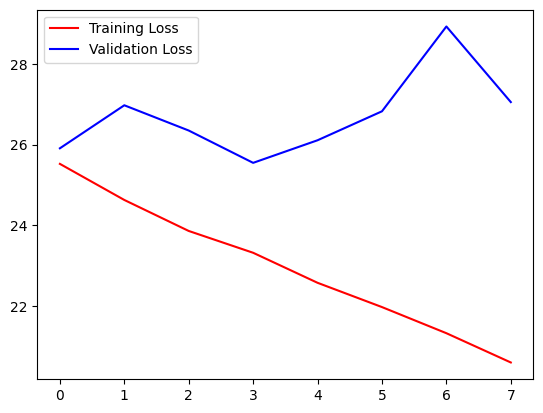

In [ ]:
#comparing loss
plt.plot(history_tuned.history['loss'], label='Training Loss',color='red')
plt.plot(history_tuned.history['val_loss'], label='Validation Loss',color='blue')
plt.legend()
plt.show()

**Comparing Accuracy**

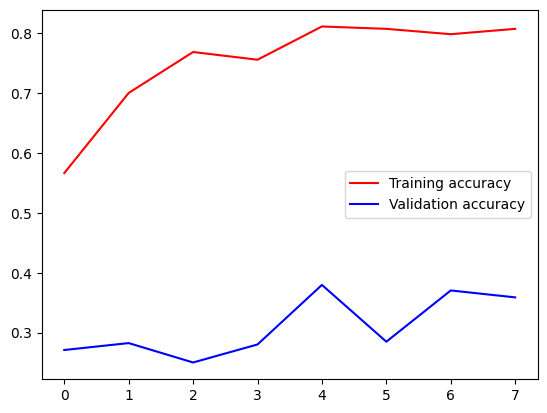

In [ ]:
#comparing accuracy
plt.plot(history_tuned.history['accuracy'], label='Training accuracy',color='red')
plt.plot(history_tuned.history['val_accuracy'], label='Validation accuracy',color='blue')
plt.legend()
plt.show()